In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
BASE_dir = 'data/processed/'

train = pd.read_json(BASE_dir + 'train.json')
test = pd.read_json(BASE_dir + 'test.json')

In [3]:
temp13= pd.read_csv('resnet34_retrain_all.csv')
#temp12.corr()
temp13['is_iceberg_max'] = temp13.iloc[:, :23].max(axis=1)
temp13['is_iceberg_min'] = temp13.iloc[:, :23].min(axis=1)
temp13['is_iceberg_median'] = temp13.iloc[:, :23].median(axis=1)
temp13['is_iceberg_mean'] = temp13.iloc[:, :23].mean(axis=1)
# set up cutoff threshold for lower and upper bounds, easy to twist 
cutoff_lo = 0.95
cutoff_hi = 0.05

#temp11['is_iceberg_base'] = temp11['is_iceberg3']
# temp13['is_iceberg'] = np.where(np.all(temp13.iloc[:,0:23] > cutoff_lo, axis=1), 
#                                     temp13['is_iceberg_max'], 
#                                     np.where(np.all(temp13.iloc[:,0:23] < cutoff_hi, axis=1),
#                                              temp13['is_iceberg_min'], 
#                                              temp13['is_iceberg_median']))

temp13['is_iceberg'] = temp13['is_iceberg_mean']

In [4]:
# temp11 = pd.read_csv('50_plain_fcn.csv')
# temp11['is_iceberg_max'] = temp11.iloc[:, :50].max(axis=1)
# temp11['is_iceberg_min'] = temp11.iloc[:, :50].min(axis=1)
# temp11['is_iceberg_median'] = temp11.iloc[:, :50].median(axis=1)
# temp11['is_iceberg_mean'] = temp11.iloc[:, :50].mean(axis=1)
# # set up cutoff threshold for lower and upper bounds, easy to twist 
# cutoff_lo = 0.95
# cutoff_hi = 0.05

# #temp11['is_iceberg_base'] = temp11['is_iceberg3']
# # temp11['is_iceberg'] = np.where(np.all(temp11.iloc[:,0:50] > cutoff_lo, axis=1), 
# #                                     temp11['is_iceberg_max'], 
# #                                     np.where(np.all(temp11.iloc[:,0:50] < cutoff_hi, axis=1),
# #                                              temp11['is_iceberg_min'], 
# #                                              temp11['is_iceberg_median']))

temp11 = pd.read_csv('submissionfcn.csv')
temp11['is_iceberg'] = temp11['is_iceberg']

In [5]:
temp12= pd.read_csv('plain_cnn_LB0_1636.csv')
num=5
temp12['is_iceberg_max'] = temp12.iloc[:, :num].max(axis=1)
temp12['is_iceberg_min'] = temp12.iloc[:, :num].min(axis=1)
temp12['is_iceberg_median'] = temp12.iloc[:, :num].median(axis=1)
temp12['is_iceberg_mean'] = temp12.iloc[:, :num].mean(axis=1)
# set up cutoff threshold for lower and upper bounds, easy to twist 
cutoff_lo = 0.95
cutoff_hi = 0.05

#temp11['is_iceberg_base'] = temp11['is_iceberg3']
# temp12['is_iceberg'] = np.where(np.all(temp12.iloc[:,0:36] > cutoff_lo, axis=1), 
#                                     temp12['is_iceberg_max'], 
#                                     np.where(np.all(temp12.iloc[:,0:36] < cutoff_hi, axis=1),
#                                              temp12['is_iceberg_min'], 
#                                              temp12['is_iceberg_median']))

temp12['is_iceberg']=temp12['is_iceberg_mean'] 

In [6]:
temp14= pd.read_csv('6_retrain_inception.csv')
temp14['is_iceberg_max'] = temp12.iloc[:, :6].max(axis=1)
temp14['is_iceberg_min'] = temp12.iloc[:, :6].min(axis=1)
temp14['is_iceberg_median'] = temp12.iloc[:, :6].median(axis=1)
temp14['is_iceberg_mean'] = temp12.iloc[:, :6].mean(axis=1)
# set up cutoff threshold for lower and upper bounds, easy to twist 
# cutoff_lo = 0.95
# cutoff_hi = 0.05

# #temp11['is_iceberg_base'] = temp11['is_iceberg3']
# temp12['is_iceberg'] = np.where(np.all(temp12.iloc[:,0:36] > cutoff_lo, axis=1), 
#                                     temp12['is_iceberg_max'], 
#                                     np.where(np.all(temp12.iloc[:,0:36] < cutoff_hi, axis=1),
#                                              temp12['is_iceberg_min'], 
#                                              temp12['is_iceberg_median']))
temp14['is_iceberg']=temp14['is_iceberg_mean'] 




In [7]:

temp111= pd.read_csv('others/sub_200_ens_densenet.csv')
temp112= pd.read_csv('others/sub_blend009.csv')
temp112_2= pd.read_csv('others/my_gbm_463mean.csv')

temp113= pd.read_csv('others/sub_fcn.csv')

temp114= pd.read_csv('others/senet_ice.csv')
temp115= pd.read_csv('others/sub_TF_keras.csv')
temp116= pd.read_csv('others/sub_keras_beginner.csv')

#! ls others

In [9]:
temp17.corr()

,is_iceberg
is_iceberg,1.0


In [8]:
for_test = pd.DataFrame()
for_test['fcn']=temp11['is_iceberg']
for_test['cnn']=temp12['is_iceberg']
for_test['resnet34']=temp13['is_iceberg']
for_test['inception'] = temp14['is_iceberg']

for_test['200-dense']=temp111['is_iceberg']
for_test['my_gbm']=temp112_2['is_iceberg']

for_test['senet']=temp114['is_iceberg']


# for_test['gbm']=temp112['is_iceberg']
# for_test['ori_fcn']=temp113['is_iceberg']
# for_test['tf-keras'] =temp115['is_iceberg']
# for_test['keras'] =temp116['is_iceberg']


for_test.corr()

,fcn,cnn,resnet34,inception,200-dense,my_gbm,senet
fcn,1.000000,0.791362,0.851287,0.778656,0.939279,0.430973,0.932430
cnn,0.791362,1.000000,0.768250,0.998744,0.719841,0.610230,0.829205
resnet34,0.851287,0.768250,1.000000,0.760871,0.844862,0.612892,0.883297
inception,0.778656,0.998744,0.760871,1.000000,0.706800,0.617580,0.819906
200-dense,0.939279,0.719841,0.844862,0.706800,1.000000,0.411951,0.951330
my_gbm,0.430973,0.610230,0.612892,0.617580,0.411951,1.000000,0.548838
senet,0.932430,0.829205,0.883297,0.819906,0.951330,0.548838,1.000000


In [27]:
temp17 = pd.read_csv('r2_11_plain_cnn.csv')
# temp17.columns= range(11)
# final = temp17.join(temp12)
temp12['base_model'] = temp17.mean(axis=1)
final = temp12

In [ ]:
final.corr()

In [9]:
temp11 = for_test
num=7


temp11['is_iceberg_max'] = temp11.iloc[:, :num].max(axis=1)
temp11['is_iceberg_min'] = temp11.iloc[:, :num].min(axis=1)
temp11['is_iceberg_median'] = temp11.iloc[:, :num].median(axis=1)
temp11['is_iceberg_mean'] = temp11.iloc[:, :num].mean(axis=1)
# set up cutoff threshold for lower and upper bounds, easy to twist 
cutoff_lo = 0.9
cutoff_hi = 0.1

#temp11['is_iceberg_base'] = temp11['is_iceberg3']
temp11['is_iceberg'] = np.where(np.all(temp11.iloc[:,0:num] > cutoff_lo, axis=1), 
                                    temp11['is_iceberg_max'], 
                                    np.where(np.all(temp11.iloc[:,0:num] < cutoff_hi, axis=1),
                                             temp11['is_iceberg_min'], 
                                             temp11['is_iceberg_median']))

# temp11['is_iceberg'] = np.where(np.all(temp11.iloc[:,0:num] > cutoff_lo, axis=1), 
#                                     1-1e-10, 
#                                     np.where(np.all(temp11.iloc[:,0:num] < cutoff_hi, axis=1),
#                                              1e-10, 
#                                              temp11['is_iceberg_median']))



# temp11 = temp12
# temp11['is_iceberg_max'] = temp11.iloc[:, :36].max(axis=1)
# temp11['is_iceberg_min'] = temp11.iloc[:, :36].min(axis=1)
# temp11['is_iceberg_median'] = temp11.iloc[:, :36].median(axis=1)
# temp11['is_iceberg_mean'] = temp11.iloc[:, :36].mean(axis=1)
# # set up cutoff threshold for lower and upper bounds, easy to twist 
# cutoff_lo = 0.95
# cutoff_hi = 0.05

# #temp11['is_iceberg_base'] = temp11['is_iceberg3']
#  temp11['is_iceberg'] = np.where(np.all(temp11.iloc[:,0:36] > cutoff_lo, axis=1), 
#                                     temp11['is_iceberg_max'], 
#                                     np.where(np.all(temp11.iloc[:,0:36] < cutoff_hi, axis=1),
#                                              temp11['is_iceberg_min'], 
#                                              temp11['is_iceberg_median']))

1223
1267
3       0.999678
7       0.999996
19      0.995600
29      0.999985
34      0.988143
35      0.996533
39      0.999858
46      0.999969
48      0.999981
52      0.999964
55      0.993927
62      0.999995
73      0.999955
77      0.999992
81      0.999984
93      0.999963
103     0.999861
111     1.000000
120     0.999995
123     0.999987
128     0.999851
131     1.000000
138     0.999984
147     0.989625
148     0.991558
161     0.999954
162     0.999959
168     0.999988
174     0.999995
186     0.999999
          ...   
8227    0.999799
8229    0.999563
8244    0.999997
8254    0.999993
8255    0.999844
8259    0.999997
8270    0.999983
8281    0.999986
8282    0.999997
8289    0.999229
8294    0.999869
8300    0.999450
8318    0.999854
8328    0.999997
8329    0.999979
8330    0.999491
8339    0.999960
8340    0.999990
8347    0.999973
8351    0.999928
8354    0.999911
8362    0.999975
8365    0.999987
8371    0.999872
8374    0.999972
8387    0.999967
8409    0.999999
8412

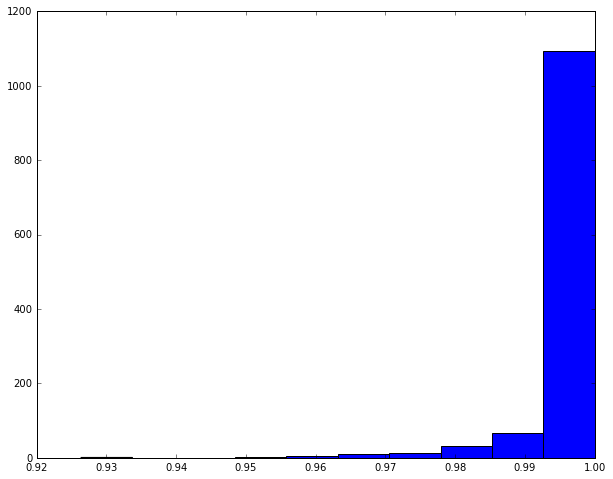

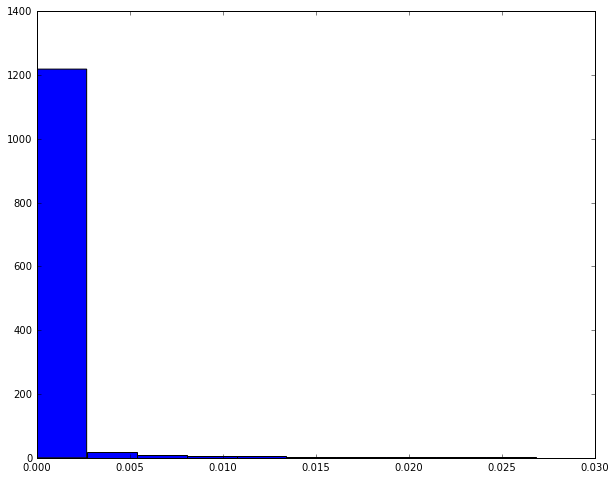

0.15771332383155823

In [47]:
cutoff_lo = 0.8
cutoff_hi = 0.1

print(np.sum(np.all(temp11.iloc[:,0:num] > cutoff_lo, axis=1)))
print(np.sum(np.all(temp11.iloc[:,0:num] < cutoff_hi, axis=1)))
print(temp11['is_iceberg_max'][np.all(temp11.iloc[:,0:num] > cutoff_lo, axis=1)])
#plt.hist(np.histogram(temp11['is_iceberg_max'][np.all(temp11.iloc[:,0:num] > cutoff_lo, axis=1)]))
plt.hist(temp11['is_iceberg_max'][np.all(temp11.iloc[:,0:num] > cutoff_lo, axis=1)])
plt.show()

plt.hist(temp11['is_iceberg_min'][np.all(temp11.iloc[:,0:num] < cutoff_hi, axis=1)])
plt.show()

np.sum(temp11['is_iceberg_min'][np.all(temp11.iloc[:,0:num] < cutoff_hi, axis=1)]>0.01)

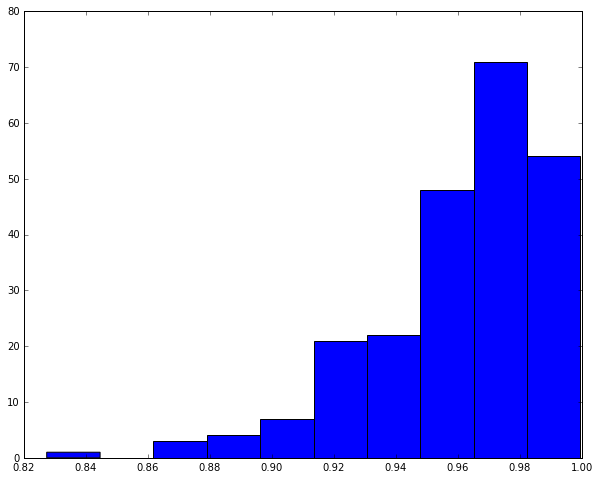

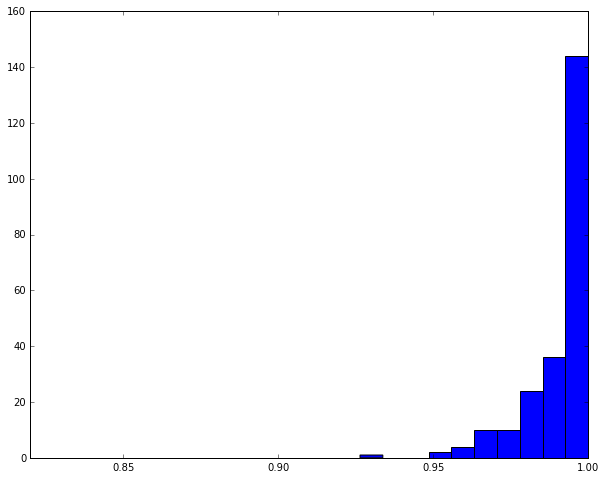

In [68]:
#check what happens between 0.8 and 0.9
a =temp11['is_iceberg_median'][np.all(temp11.iloc[:,0:num] > 0.9, axis=1).astype(np.int)+(np.all(temp11.iloc[:,0:num] > 0.8, axis=1)).astype(np.int)==1]
plt.hist(a)
plt.show()

a =temp11['is_iceberg_max'][np.all(temp11.iloc[:,0:num] > 0.9, axis=1).astype(np.int)+(np.all(temp11.iloc[:,0:num] > 0.8, axis=1)).astype(np.int)==1]
plt.axes(xlim=(0.82,1))
plt.hist(a)
plt.show()

#np.sum((np.all(temp11.iloc[:,0:num] > 0.9, axis=1) +np.all(temp11.iloc[:,0:num] > 0.8, axis=1) ==1))


In [71]:
print(np.sum(1- temp11['is_iceberg_max'][np.all(temp11.iloc[:,0:num] > 0.9, axis=1).astype(np.int)+(np.all(temp11.iloc[:,0:num] > 0.8, axis=1)).astype(np.int)==1]))

print(np.sum(temp11['is_iceberg_min'][np.all(temp11.iloc[:,0:num] < 0.2, axis=1).astype(np.int)+(np.all(temp11.iloc[:,0:num] < 0.1, axis=1)).astype(np.int)==1]))

1.97791260732
1.47904292347


In [10]:
sub=pd.DataFrame()
sub['id'] = test['id']
sub['is_iceberg'] =  temp11['is_iceberg']
#
sub.to_csv('submission456.csv',index=False)


In [19]:
#sub.corr()
np.sum(np.sum(temp11.iloc[:,:8]<=0.2,axis=1)==8)
#8 models below 0.1: 1232
#8 models above 0.9: 852

#8 models below 0.1: 1814
#8 models above 0.9: 1042


1814